<img src="images/ProjectPythia_Logo_Final-01-Blue.svg" width=300 alt="Project Pythia Logo"></img>

<img src="https://images.unsplash.com/photo-1571171637578-41bc2dd41cd2?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width=300, alt="Computer code displayed on dual monitors (October 15, 2019)"></img><p>
Photo by <a href="https://unsplash.com/@ffstop?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Fotis Fotopoulos</a> on <a href="https://unsplash.com/photos/black-computer-keyboard-DuHKoV44prg?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

# API Basics

---

## Overview
This notebook will cover the terminology and steps needed to retrieve data from an API

1. Prerequisites
2. Motivation
3. API Terminology (and Status Codes)
4. Imports
7. Example: Weather API
8. Summary

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Plotting on a data |

---

## Motivation

There are many ways to gather data. Science and research entities like NASA are constantly producing and collecting data. As a result, attempting to collect and display live data can be difficult since new data is always being added. An API is a method to query a data source for the most current data or retrieve data from a remote source. This notebook will cover the basics regarding API usage to improve ease of access to publicly available data.

---

## API Terminology

- API: Application Programming Interface which dictacts how code can communicate and access or update remote data through methods
- Request: Code sends `requests` to an API to either retrieve or update data
- GET: A `GET` request retrieves data
- SET: A `SET` request updates data

When working with public APIs, most methods will request data from an API (a `GET` request)

### Understanding Status Codes

There are [multiple possible status codes](https://www.geeksforgeeks.org/python-api-tutorial-getting-started-with-apis/#api-status-codes) that a request will return. For the purpose of simplicity, the two most important codes are:
- 200 OK: The server was able to successfully process the request and return the requested data
- 400 Bad Request: The server was *not* able to process the request do to an invalid request (usally the result of an invalid URL or unknown parameters)

---

## Imports

In [1]:
import requests # access API
import matplotlib.pyplot as plt

### Requests

The [Requests Python package](https://requests.readthedocs.io/en/latest/) is a library that manages the requests made in Python

A request returns machine-readable data in a JSON. Among the data, requests returns:
- request.status_code: status code of the request (200, 400, etc...)
- request.text: data requested as a JSON
- request.json(): fully JSON returned by the request

---

## Example: Weather API

The [National Weather Serivce](@weather-gov) manages an [API](https://github.com/weather-gov/api) for weather in the United States. The API is hosted at `https://api.weather.gov/`

The first step when working with an API should be to check that the API is fuctioning by querying a general request without any additional parameters.

In [2]:
weather_request = requests.get("https://api.weather.gov/")
weather_request.status_code

200

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>

A `200` status code represents that the base API is working as expected and a query request returns no errors. However, without any additional parameters, all the data that the request returns is just the status code.
</div>

In [3]:
# All Data
weather_request.json()

{'status': 'OK'}

The next step is to query with specific paramters. For the weather API the accepts either a grid around a NWS Weather Forecast Office or a specific latitude/longtiude position 

The request will be formatted as: 

```
https://api.weather.gov/points/<latitude>,<longitude>
```

For more information about the documentation can be found at [NWS Weather API](https://www.weather.gov/documentation/services-web-api).

For example, the location of the [NCAR Mesa Lab](https://en.wikipedia.org/wiki/Mesa_Laboratory) is `39.97777` degrees latitude and `-105.274966` degrees longitude

In [4]:
ncar_weather = requests.get("https://api.weather.gov/points/39.97777,-105.274966")

In [5]:
# Check request returned a valid response
ncar_weather.status_code

200

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
With a valid request and paramters, this request will return data as well!
</div>

In [6]:
ncar_weather.json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/39.9778,-105.275',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-105.275, 39.9778]},
 'properties': {'@id': 'https://api.weather.gov/p

With the latitude and longtiude of a position, the API will return information about the closest NWS forecast office that can be further queried to return the weather. A JSON acts like a Python dictionary; to return the values stored, `json()` can be queried for a specific key.

In [7]:
# JSON as Dictionary
print(type(ncar_weather.json()))
for key, value in ncar_weather.json().items():
    print(f"\nkey: {key}")
    print(f"value: {value}")

<class 'dict'>

key: @context
value: ['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}]

key: id
value: https://api.weather.gov/points/39.9778,-105.275

key: type
value: Feature

key: geometry
value: {'type': 'Point', 'coordinates': [-105.275, 39.9778]}

key: properties
value: {'@id': 'https://api.weather.gov

The closest forecast office from the NCAR Mesa Lab is `forecastOffice`

In [8]:
ncar_weather.json()["properties"]["forecastOffice"]

'https://api.weather.gov/offices/BOU'

The query also return the hourly forecast as a further URL to query as a request under `forecastHourly`

In [9]:
ncar_forecast_url = ncar_weather.json()["properties"]["forecastHourly"]
ncar_forecast_url

'https://api.weather.gov/gridpoints/BOU/54,73/forecast/hourly'

In [10]:
ncar_forecast_hourly = requests.get(ncar_forecast_url)
ncar_forecast_hourly.status_code

200

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>

There is a lot more data returned from this request! The forecast information can be collected under `properties` and `period`. Each period of time has various weather values to chose from:
</div>

In [11]:
ncar_forecast_hourly.json()["properties"]["periods"][0].keys()

dict_keys(['number', 'name', 'startTime', 'endTime', 'isDaytime', 'temperature', 'temperatureUnit', 'temperatureTrend', 'probabilityOfPrecipitation', 'dewpoint', 'relativeHumidity', 'windSpeed', 'windDirection', 'icon', 'shortForecast', 'detailedForecast'])

To plot, let's collect the `startTime`, `endTime` and `temperature` (&deg; F) values

In [12]:
datetime_start = ncar_forecast_hourly.json()["properties"]["periods"][0]["startTime"]
datetime_end = ncar_forecast_hourly.json()["properties"]["periods"][-1]["endTime"]
print(datetime_start)
print(datetime_end)

2024-06-19T04:00:00-06:00
2024-06-25T16:00:00-06:00


In [13]:
# Temperatures every hour
hour_x = []
temperature = []
for period in ncar_forecast_hourly.json()["properties"]["periods"]:
    hour_x.append(period["startTime"])
    temperature.append(period["temperature"]) # collection of temperatures 
print(temperature)

[55, 53, 52, 53, 54, 56, 58, 60, 62, 64, 65, 66, 66, 65, 64, 63, 61, 60, 59, 58, 58, 57, 57, 56, 55, 55, 56, 58, 63, 65, 71, 74, 77, 80, 80, 78, 77, 76, 75, 74, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 62, 63, 65, 67, 70, 73, 75, 77, 78, 78, 79, 80, 80, 78, 75, 73, 71, 71, 70, 69, 68, 67, 66, 65, 65, 67, 70, 74, 77, 80, 82, 84, 84, 84, 84, 83, 82, 80, 77, 75, 73, 72, 71, 69, 68, 66, 65, 64, 64, 67, 70, 75, 79, 83, 86, 88, 89, 90, 89, 88, 86, 84, 81, 78, 76, 75, 74, 72, 71, 70, 68, 67, 67, 70, 73, 77, 81, 84, 87, 88, 89, 89, 88, 87, 86, 83, 80, 78, 76, 74, 73, 72, 71, 70, 69, 69, 69, 72, 75, 79, 83, 86, 88, 90, 91, 91]


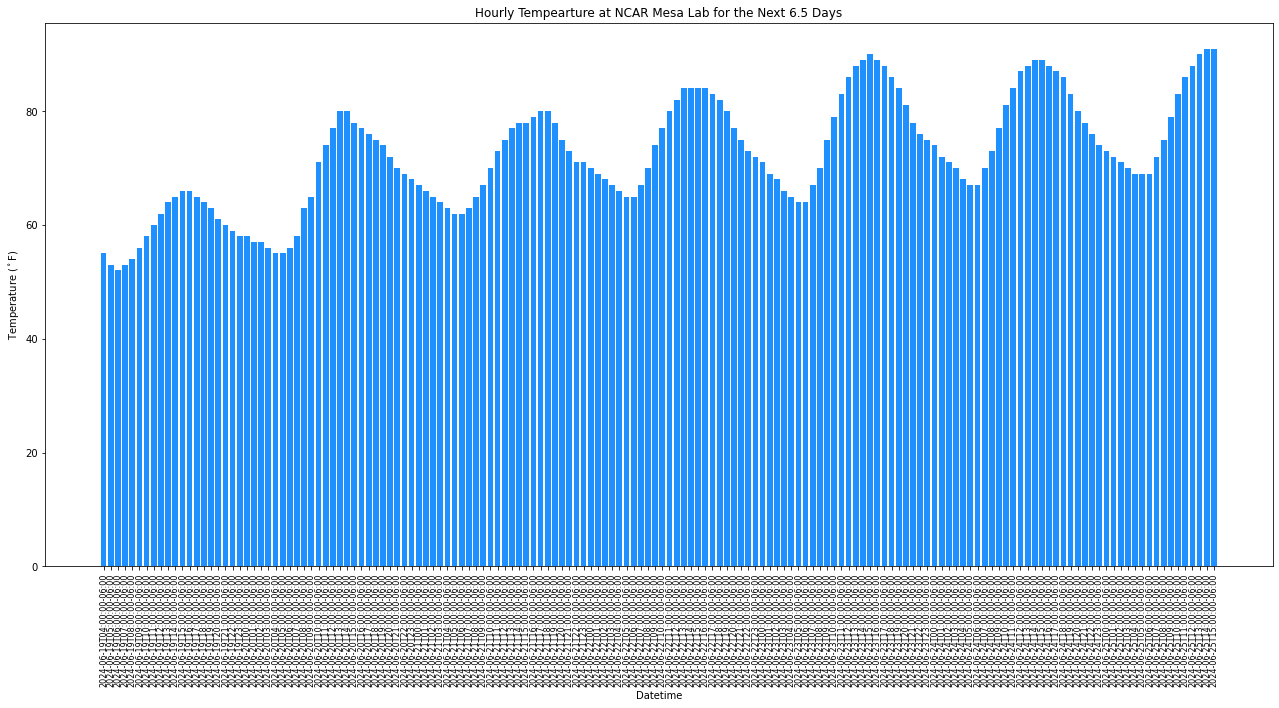

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(22, 10))

# Plot Fireball Locations with Energy
plt.bar(hour_x, temperature, color="dodgerblue")

# Setup Axis Limits and Title/Labels
plt.title(f"Hourly Tempearture at NCAR Mesa Lab for the Next {len(temperature)/24} Days")
plt.xlabel("Datetime")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Temperature ($^\circ$F)")
plt.show()

---

## Summary
In this notebook, we have...
- covered basics about API terminology
- gone through a practice example of requesting data from the National Weather Service API
- generated a plot of forecasted temperatures

### What's next?
Now we can continue investigating other APIs using some example workflows in this cookbook.
- [Center for Near-Earth Object Studies Fireball API](../example-workflows/cneos-fireball.ipynb)
- [Environmental Protection Agency's Air Quality System API](../example-workflows/air-quality-system-api.ipynb)
- [National Aeronautics and Space Administration Earthaccess API](../example-workflows/earthaccess-sla-sss)
- [Whiteface Mountain Cloud Water Request](../example-workflows/wfm-cloud-water)

## Resources and references

- [Python API Tutorial: Getting Started with APIs](https://www.geeksforgeeks.org/python-api-tutorial-getting-started-with-apis/)
- [Requests Python Library](https://requests.readthedocs.io/en/latest/)
- [National Weather Service API](https://www.weather.gov/documentation/services-web-api)